In [ ]:
# Code for the Book: International Stock Picking A.I. INVESTOR: A Guide to Build.
# Website: ai-investor.net
# Code needs am "All-In-One" subscription from the (presumably) nice people at https://eodhistoricaldata.com/. 
# Check the book text to see if they have changed their service since mid-2021.

# Damon Lee 2021

# Feel free to fork this code for others to see what can be done with it.

In [ ]:
myToken = 'ABC123zyx.XXXXXXXXXX' # put own token from eodhistoricaldata.com here

In [2]:
# Set the plotting DPI settings to be a bit higher.
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [7.0, 4.5]
plt.rcParams['figure.dpi'] = 150

# API Requests With EODHistoricalData

In [ ]:
import requests
session = requests.Session()
params = {'api_token': myToken}
r = session.get('https://eodhistoricaldata.com/api/user/', params=params)
r.text

# Request Fundamental Data For One Company
(And explore some of the data)

In [4]:
import requests
import json

def get_fundamental_data(symbol='MCD.US', 
                         api_token='OeAFFmMliFG5orCUuwAKQ8l4WWFQ67YX', 
                         session=None, 
                         continueWhenError=False): #Move to myFunctions.py
    '''Get stock fundamental data as a Dictionary.'''
    
    if session is None:
        session = requests.Session()
    url = 'https://eodhistoricaldata.com/api/fundamentals/'+ symbol
    params = {'api_token': api_token}
    r = session.get(url, params=params)
        
    if r.status_code == requests.codes.ok:
        return json.loads(r.text) # returns a dictionary
    else:
        if continueWhenError:
            with open("get_fundamental_data_issues.txt", "a") as myfile:
                myfile.write(symbol+' '+str(r.status_code)+' '+\
                             str(r.reason)+' '+str(url)+'\n')
                myfile.close()
        else:
            raise Exception(r.status_code, r.reason, url)

In [5]:
singleStockData = get_fundamental_data('INTC.US', myToken)
singleStockData.keys() # view the keys

dict_keys(['General', 'Highlights', 'Valuation', 'SharesStats', 'Technicals', 'SplitsDividends', 'AnalystRatings', 'Holders', 'InsiderTransactions', 'ESGScores', 'outstandingShares', 'Earnings', 'Financials'])

In [6]:
singleStockData['General']

{'Code': 'INTC',
 'Type': 'Common Stock',
 'Name': 'Intel Corporation',
 'Exchange': 'NASDAQ',
 'CurrencyCode': 'USD',
 'CurrencyName': 'US Dollar',
 'CurrencySymbol': '$',
 'CountryName': 'USA',
 'CountryISO': 'US',
 'ISIN': 'US4581401001',
 'CUSIP': '458140100',
 'CIK': '50863',
 'EmployerIdNumber': '94-1672743',
 'FiscalYearEnd': 'December',
 'IPODate': '1971-10-13',
 'InternationalDomestic': 'International/Domestic',
 'Sector': 'Technology',
 'Industry': 'Semiconductors',
 'GicSector': 'Information Technology',
 'GicGroup': 'Semiconductors & Semiconductor Equipment',
 'GicIndustry': 'Semiconductors & Semiconductor Equipment',
 'GicSubIndustry': 'Semiconductors',
 'HomeCategory': 'Domestic',
 'IsDelisted': False,
 'Description': 'Intel Corporation designs, manufactures, and sells essential technologies for the cloud, smart, and connected devices for retail, industrial, and consumer uses worldwide. The company operates through DCG, IOTG, Mobileye, NSG, PSG, CCG, and All Other segment

In [7]:
singleStockData['Financials'].keys()

dict_keys(['Balance_Sheet', 'Cash_Flow', 'Income_Statement'])

In [8]:
singleStockData['Financials']['Income_Statement']['yearly'].keys()

dict_keys(['2020-12-31', '2019-12-31', '2018-12-31', '2017-12-31', '2016-12-31', '2015-12-31', '2014-12-31', '2013-12-31', '2012-12-31', '2011-12-31', '2010-12-31', '2009-12-31', '2008-12-31', '2007-12-31', '2006-12-31', '2005-12-31', '2004-12-31', '2003-12-31', '2002-12-31', '2001-12-31', '2000-12-31', '1999-12-31', '1998-12-31', '1997-12-31', '1996-12-31', '1995-12-31', '1994-12-31'])

In [9]:
singleStockData['Financials']['Income_Statement']['yearly']['2019-12-31'] # Income statement 2019
# https://s1.q4cdn.com/281009473/files/doc_downloads/documents/2019-Annual-Report.pdf

{'date': '2019-12-31',
 'filing_date': '2020-01-24',
 'currency_symbol': 'USD',
 'researchDevelopment': '13362000000.00',
 'effectOfAccountingCharges': None,
 'incomeBeforeTax': '24058000000.00',
 'minorityInterest': None,
 'netIncome': '21048000000.00',
 'sellingGeneralAdministrative': '6150000000.00',
 'sellingAndMarketingExpenses': None,
 'grossProfit': '42140000000.00',
 'reconciledDepreciation': '10826000000.00',
 'ebit': '22035000000.00',
 'ebitda': '32861000000.00',
 'depreciationAndAmortization': '10826000000.00',
 'nonOperatingIncomeNetOther': '2023000000.00',
 'operatingIncome': '22035000000.00',
 'otherOperatingExpenses': '49930000000.00',
 'interestExpense': '489000000.00',
 'taxProvision': '3010000000.00',
 'interestIncome': '483000000.00',
 'netInterestIncome': '-6000000.00',
 'extraordinaryItems': None,
 'nonRecurring': '393000000.00',
 'otherItems': None,
 'incomeTaxExpense': '3010000000.00',
 'totalRevenue': '71965000000.00',
 'totalOperatingExpenses': '20105000000.00'

# Plotting Financial Data Over Time

In [10]:
incomeByYear = []
dates = singleStockData['Financials']['Income_Statement']['yearly'].keys()
for year in dates:
    incomeByYear.append(float(singleStockData['Financials']['Income_Statement']['yearly'][year]['netIncome'])/1e9)

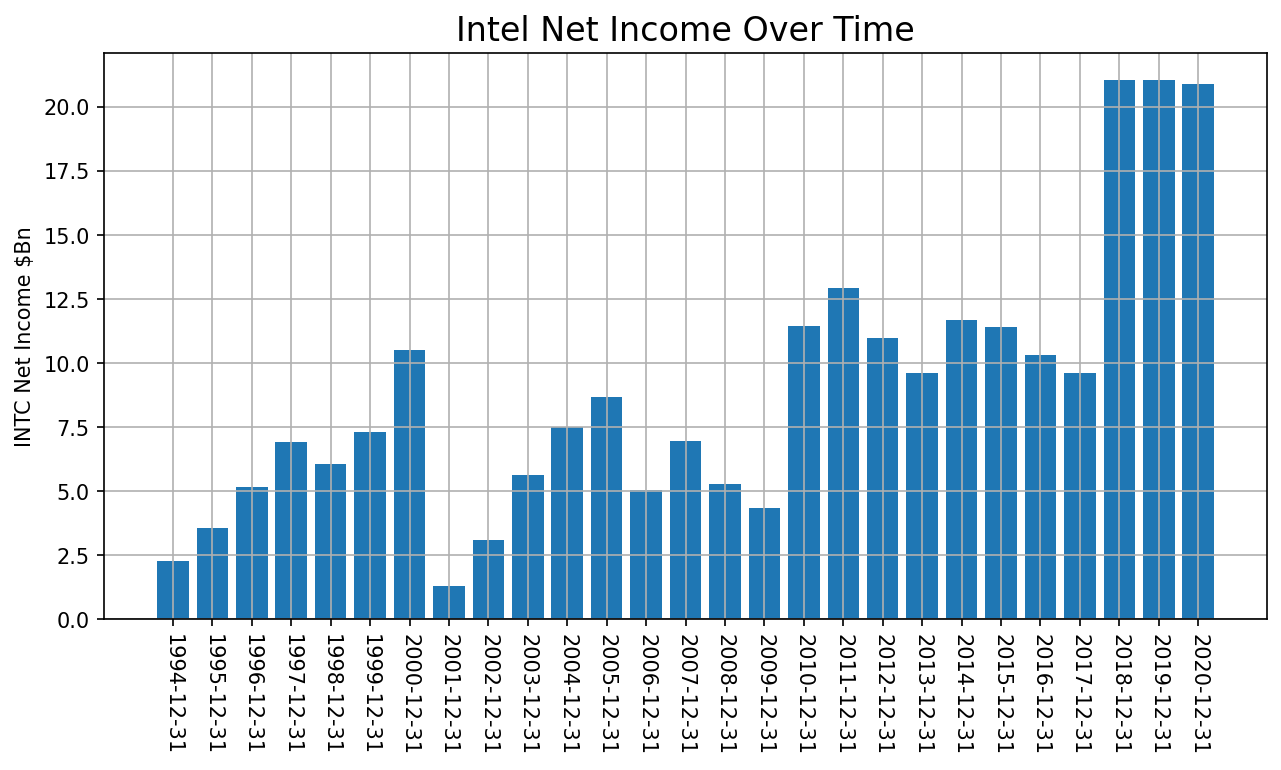

In [11]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,5))

plt.bar(x=singleStockData['Financials']['Income_Statement']['yearly'].keys(), height=incomeByYear)
plt.xticks(rotation=-90)
plt.grid()
plt.title('Intel Net Income Over Time', fontsize=16)
plt.ylabel('INTC Net Income $Bn')
ax = plt.gca()
ax.invert_xaxis()

In [12]:
incomeByYear

[20.899,
 21.048,
 21.053,
 9.601,
 10.316,
 11.42,
 11.704,
 9.62,
 11.005,
 12.942,
 11.464,
 4.369,
 5.292,
 6.976,
 5.044,
 8.664,
 7.516,
 5.641,
 3.117,
 1.291,
 10.535,
 7.314,
 6.068,
 6.945,
 5.157,
 3.566,
 2.288]